In [1]:
%pylab inline

from scipy.integrate import solve_ivp
import sdeint

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle

In [3]:
def reference_circle(r,t):

    theta = np.linspace(0, t, 1000)
    rho = r

    x1 = rho*np.cos(theta)
    x2 = rho*np.sin(theta)
    return x1,x2

In [4]:
simuxy = pickle.load(open('1000_trajec 200_sec 5000_time_steps [1 0e-10 0 1 0 fd0].dat','rb'))
simurt = pickle.load(open('1000_trajec 200_sec 5000_time_steps [1 0e-10 0 1 0 fd0].dat','rb'))
shape(simuxy), shape(simurt)

((1000, 5000, 6), (1000, 5000, 6))

In [5]:
samplesize = len(simurt)
dataxy_pre = []
datart_pre = []
for i in range(0,samplesize):
    dataxy_pre.extend(simuxy[i][1000:5000])
    datart_pre.extend(simurt[i][1000:5000])

shape(dataxy_pre), shape(datart_pre)

((4000000, 6), (4000000, 6))

In [6]:
dataxy = np.array(dataxy_pre).T.tolist()
datart = np.array(datart_pre).T.tolist()
shape(dataxy), shape(datart)

((6, 4000000), (6, 4000000))

In [7]:
#-------------------------------------------------
# Means, Histograms and more of 1000 trajectories
#-------------------------------------------------

In [8]:
import statistics as stat
import scipy.optimize
import matplotlib.mlab as mlab
import scipy.stats as scs
from scipy.optimize import curve_fit

In [9]:
rdataxy = np.sqrt(np.square(dataxy[0])+np.square(dataxy[1]))
thdataxy = np.arctan(np.divide(dataxy[1],dataxy[0]))

rdatart = np.sqrt(np.square(datart[0])+np.square(datart[1]))
thdatart = np.arctan(np.divide(datart[1],datart[0]))

[-410.92334282  821.33563508 -398.17646739]
[-412.71852679  824.98227001 -400.0212239 ]


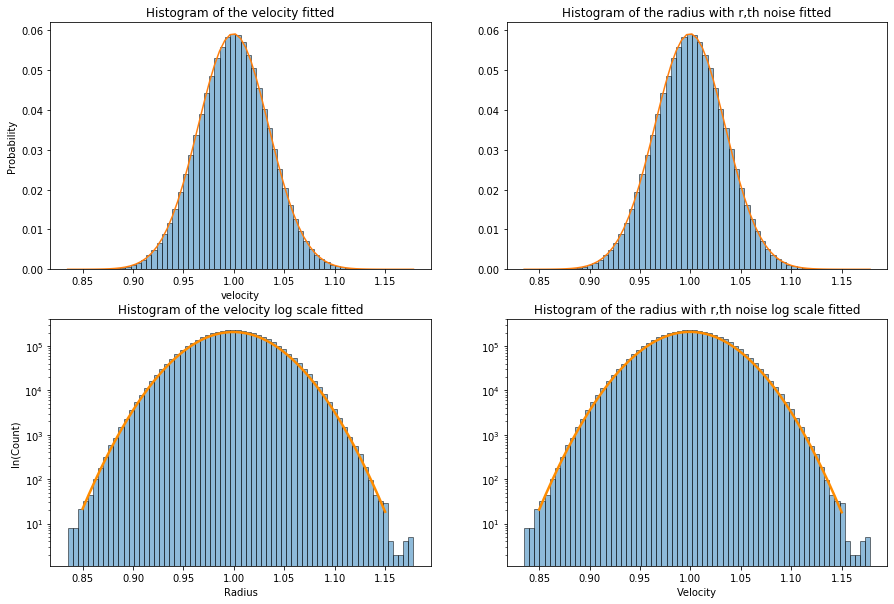

In [25]:
#---------------------------------------
# Fitting Parabola on the histogram
#---------------------------------------
rdata = np.array([rdataxy,rdatart])
thdata = np.array([thdataxy,thdatart])

fig, ax = plt.subplots(2, 2, figsize=(15,10))
for i in range(2):

    n, bins, _ = ax[0,i].hist(rdata[i], 66, weights=np.ones_like(rdata[i]) / len(rdata[i]), alpha=0.5,edgecolor='black')

    mu, sigma = scipy.stats.norm.fit(rdata[i])

    best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)

    ax[0,i].plot(bins, best_fit_line*max(n)/max(best_fit_line))

#--------------------------------------------------------------

# 1.) Necessary imports. 

# 2.) Define fit function.
def fit_function(x, a, b, c):
    return (a * x**2 + b*x + c)

for i in range(2):
    # 3.) Generate the histograms.
    bins = np.linspace(0.85, 1.15, bincount)
    data_entries, bins = np.histogram(rdata[i], bins=bins)
    binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

    # 4.) Fit the function to the histogram data.
    with errstate(divide='ignore'):
        ydat = np.log(data_entries)[3-i:60]
    popt, pcov = curve_fit(fit_function, xdata=binscenters[3-i:60], ydata=ydat, p0=[1, 1, 1,])
    print(popt)

    # 5.) Generate enough x values to make the curves look smooth.
    xspace = np.linspace(0.85, 1.15, 100000)

    # Plot the histogram and the fitted function.
    ax[1,i].hist(rdata[i],bins = bincount, label=r'Histogram entries', log='True',edgecolor='black', alpha=0.5)
    ax[1,i].plot(xspace, np.exp(fit_function(xspace, *popt)), color='darkorange', linewidth=2.5, label='Fitted function');
    
    # Making a residue plot of the fits
    #res = data_entries - np.exp(fit_function(xspace, *popt)
    
    
ax[0, 0].set_title('Histogram of the velocity fitted')
ax[0, 0].set(ylabel = 'Probability')
ax[0, 0].set(xlabel = 'velocity')

ax[0, 1].set_title('Histogram of the radius with r,th noise fitted')
    
ax[1, 0].set_title('Histogram of the velocity log scale fitted')
ax[1, 0].set(ylabel = 'ln(Count)', xlabel = 'Radius')
   
ax[1, 1].set_title('Histogram of the radius with r,th noise log scale fitted')
ax[1, 1].set(xlabel = 'Velocity');

#fig.savefig('long_time_trimmed_Histograms_with_fit.png')
#fig.savefig('Histgrams_Randius.png')

In [14]:
#--------------------------------------------------------------------------------------
# Calculating the average trajectory \\\\CAN BE IGNORED DUE TO WRONG AVERAGE
#--------------------------------------------------------------------------------------

mean_trajxy = []
mean_trajrt = []

for j in range(0,5000):
    totalxy = 0
    totalrt = 0
    for i in range(0,samplesize):
        totalxy += simuxy[i][j]
        totalrt += simurt[i][j]
    avgxy = totalxy/samplesize
    avgrt = totalrt/samplesize
    mean_trajxy.append(avgxy)
    mean_trajrt.append(avgrt)
meanxy = np.array(mean_trajxy).T.tolist()
meanrt = np.array(mean_trajrt).T.tolist()

[Text(0.5, 1.0, 'Difference in radius sol and ref. circle using r,th noise')]

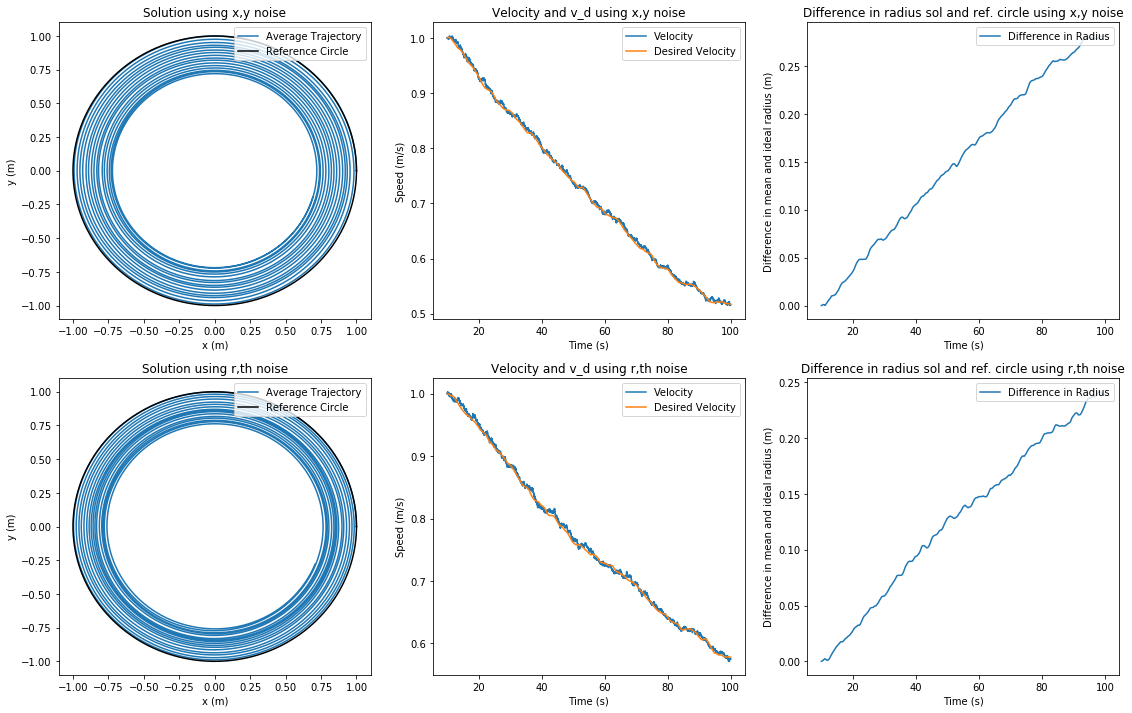

In [24]:
#---------------------------------------------------------------------------
# Plotting the mean trajectory \\\\CAN BE IGNORED DUE TO WRONG AVERAGE
#---------------------------------------------------------------------------

x1,x2 = reference_circle(1,2*np.pi)
time = linspace(10,100,5000)

fig, ax = plt.subplots(2, 3, figsize=(19,12))

ax[0,0].plot((meanxy[0])[:],(meanxy[1])[:], label = 'Average Trajectory')
ax[0,0].plot(x1,x2,'k-', label = "Reference Circle" )

ax[1,0].plot((meanrt[0])[:],(meanrt[1])[:], label = 'Average Trajectory')
ax[1,0].plot(x1,x2,'k-', label = "Reference Circle" )

ax[0,1].plot(time,np.square((meanxy[2])[:])+np.square((meanxy[3])[:]),label = 'Velocity')
ax[0,1].plot(time,np.square((meanxy[4])[:])+np.square((meanxy[5])[:]),label = 'Desired Velocity')

ax[1,1].plot(time,np.square((meanrt[2])[:])+np.square((meanrt[3])[:]),label = 'Velocity')
ax[1,1].plot(time,np.square((meanrt[4])[:])+np.square((meanrt[5])[:]),label = 'Desired Velocity');

diffxy = abs(np.sqrt(np.square(meanxy[0]) + np.square(meanxy[1])) - ones_like(meanxy[0]));
diffrt = abs(np.sqrt(np.square(meanrt[0]) + np.square(meanrt[1])) - ones_like(meanrt[0]));
ax[0,2].plot(time,diffxy, label = 'Difference in Radius')
ax[1,2].plot(time,diffrt, label = 'Difference in Radius')

for i in range(2):
    for j in range(3):
        ax[i,j].legend(loc = 1)

for i in range(2):
    for j in range(2):
        ax[j,i+1].set(xlabel = 'Time (s)')
        
for i in range(2):
    
    ax[i,0].set(xlabel = 'x (m)', ylabel = 'y (m)')
    ax[i,1].set(ylabel = 'Speed (m/s)')
    ax[i,2].set(ylabel = 'Difference in mean and ideal radius (m)')
    
ax[0,0].set(title = 'Solution using x,y noise')
ax[1,0].set(title = 'Solution using r,th noise')

ax[0,1].set(title = 'Velocity and v_d using x,y noise')
ax[1,1].set(title = 'Velocity and v_d using r,th noise')

ax[0,2].set(title = 'Difference in radius sol and ref. circle using x,y noise')
ax[1,2].set(title = 'Difference in radius sol and ref. circle using r,th noise')

#fig.savefig('long_time_changing_radius_long_time.png')

[-200.09726464  400.95944619 -188.45791436]


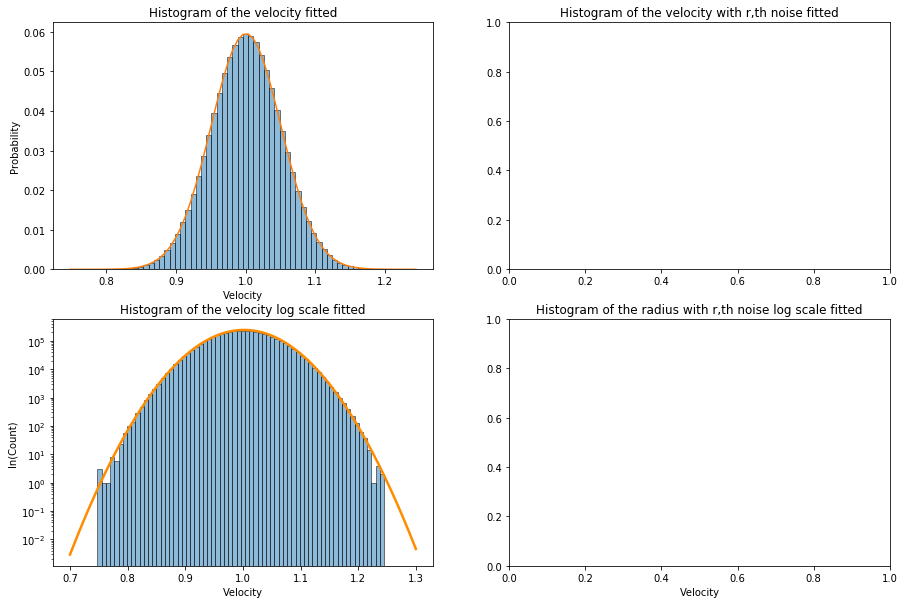

In [26]:
#---------------------------------------
# Fitting Parabola on the histogram
#---------------------------------------
vdata = np.sqrt(np.square(dataxy[2])+np.square(dataxy[3]))


fig, ax = plt.subplots(2, 2, figsize=(15,10))
for i in range(1):

    n, bins, _ = ax[0,i].hist(vdata, 66, weights=np.ones_like(vdata) / len(vdata), alpha=0.5,edgecolor='black')

    mu, sigma = scipy.stats.norm.fit(vdata)

    best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)

    ax[0,i].plot(bins, best_fit_line*max(n)/max(best_fit_line))

#--------------------------------------------------------------

# 1.) Necessary imports. 

# 2.) Define fit function.
def fit_function(x, a, b, c):
    return (a * x**2 + b*x + c)

for i in range(1):
    # 3.) Generate the histograms.
    bins = np.linspace(0.75, 1.25, bincount)
    data_entries, bins = np.histogram(vdata, bins=bins)
    binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

    # 4.) Fit the function to the histogram data.
    with errstate(divide='ignore'):
        ydat = np.log(data_entries)[3-i:60]
    popt, pcov = curve_fit(fit_function, xdata=binscenters[3-i:60], ydata=ydat, p0=[1, 1, 1,])
    print(popt)

    # 5.) Generate enough x values to make the curves look smooth.
    xspace = np.linspace(0.7, 1.3, 100000)

    # Plot the histogram and the fitted function.
    ax[1,i].hist(vdata,bins = bincount, label=r'Histogram entries', log='True',edgecolor='black', alpha=0.5)
    ax[1,i].plot(xspace, np.exp(fit_function(xspace, *popt)), color='darkorange', linewidth=2.5, label='Fitted function');
    
    # Making a residue plot of the fits
    #res = data_entries - np.exp(fit_function(xspace, *popt)
    
    
ax[0, 0].set_title('Histogram of the velocity fitted')
ax[0, 0].set(ylabel = 'Probability')
ax[0, 0].set(xlabel = 'Velocity')

ax[0, 1].set_title('Histogram of the velocity with r,th noise fitted')
    
ax[1, 0].set_title('Histogram of the velocity log scale fitted')
ax[1, 0].set(ylabel = 'ln(Count)', xlabel = 'Velocity')
   
ax[1, 1].set_title('Histogram of the radius with r,th noise log scale fitted')
ax[1, 1].set(xlabel = 'Velocity');

#fig.savefig('long_time_trimmed_Histograms_with_fit.png')
#fig.savefig('Histgrams_Randius.png')